## Overview of seaborn plotting functions

### 1. Similar functions for similar tasks

* The seaborn namespace is flat; 모든 함수는 top level에서 접근 가능하다.
* 그러나 코드는 hierarchially하게 구성되어있다. 다른 의미임에도 불구하고 modules of functions는 비슷한 visualization 목표를 달성한다.
* 문서 구성은 대부분 relational, distributional, categorical로 구성되어 있다.

* 예를 들면, distribution module은 datapoint의 분포를 나타내는 것에 특별화된 함수이다.
* distribution module은 histogram method와 친근하다.

In [1]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

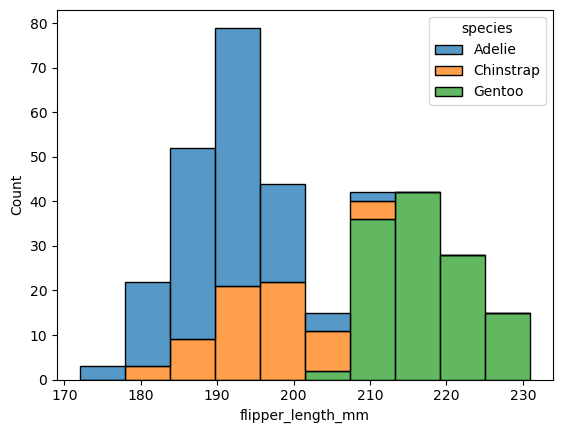

In [2]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

* 이와 비슷하지만 친근하지는 않은 것이 있는데 kernel density estimation과 같은 option이 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

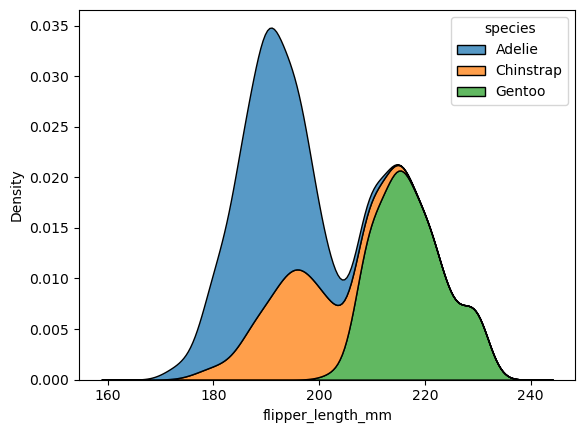

In [4]:
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

* multiple="stack" 모듈 내의 함수는 많은 기본 코드를 공유하고 라이브러리의 다른 구성 요소에 없을 수 있는 유사한 기능을 제공한다.
* 이는 다른 representaions의 강점과 양점이 보완적이기에 다른 visual representations와 switching이 용이하게 디자인 되었다.

## 2.Figure-level vs. axes-level functions


* seaborn 함수의 axes-level이나 figure-level cross-cutting 분류가 다른 module에 있다.
* 위의 예시는 axes-level 함수이다. plot data가 함수의 value 반환값인 단일의 'matplotlib.pyplot.Axes' object에 있다.
* 반면에 figure-level 함수는 seaborn object에 걸쳐 matplotlib과 interface한다. 
* 일반적으로 'FacetGrid'가 figure를 관리한다.
* 각 module은 단일의 figure-level 함수를 가지고, 이 함수는 다양한 axes-level 함수와 통합된 inteface를 제공한다.
* The organization looks a bit like this.

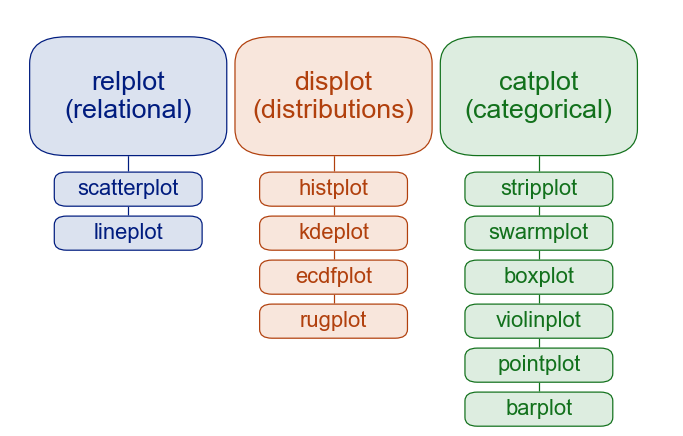

* 예를들면 displot은 distribution module의 figure-lvel 함수이다.
* 기본 동작은 배경과 동일한 코드를 사용하여 히스토그램을 그리는 것이다.

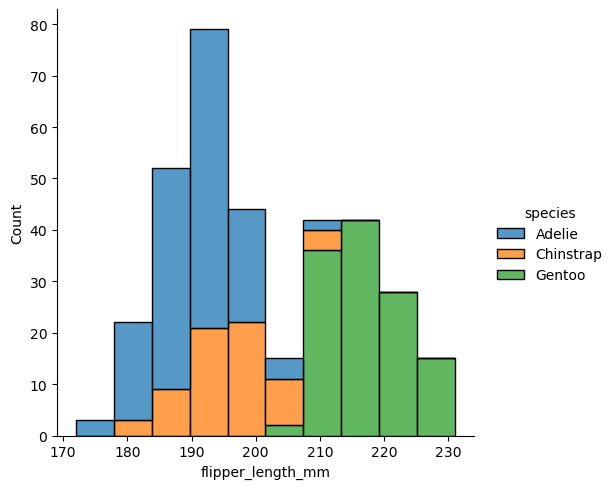

In [4]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

kernel density plot을 대신 그리면 'kdeplot()'이라는 같은 코드를 사용하고, kkind parameter를 사용하여 선택한다.

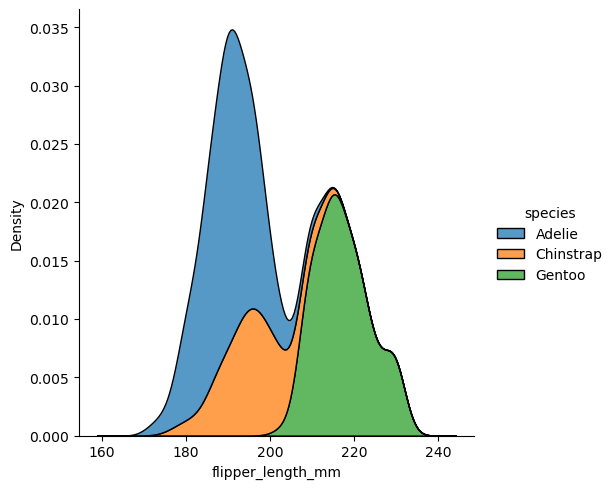

In [5]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack', kind='kde')

* figure-level 그래프가 axes-level과 거의 비슷하지만 몇가지 다른점이 있다.
* legend가 그래프 바깥에 배치되어 있다. 또한 모양이 약간 다르다.(뒤에서 더 이야기 할 것이다.)

* figure-level 함수들로부터 제공되는 매우 유용한 특징은 figure-level plots가 multiple subplot을 쉽게 나타낼 수 있다는 점이다.
* 예를들면 각 팽귄 종에 대해서 세개의 분류를 같은 축에 쌓는 대신에 각 분류를 따로 그림으로 인해 다른 측면을 볼 수 있다.

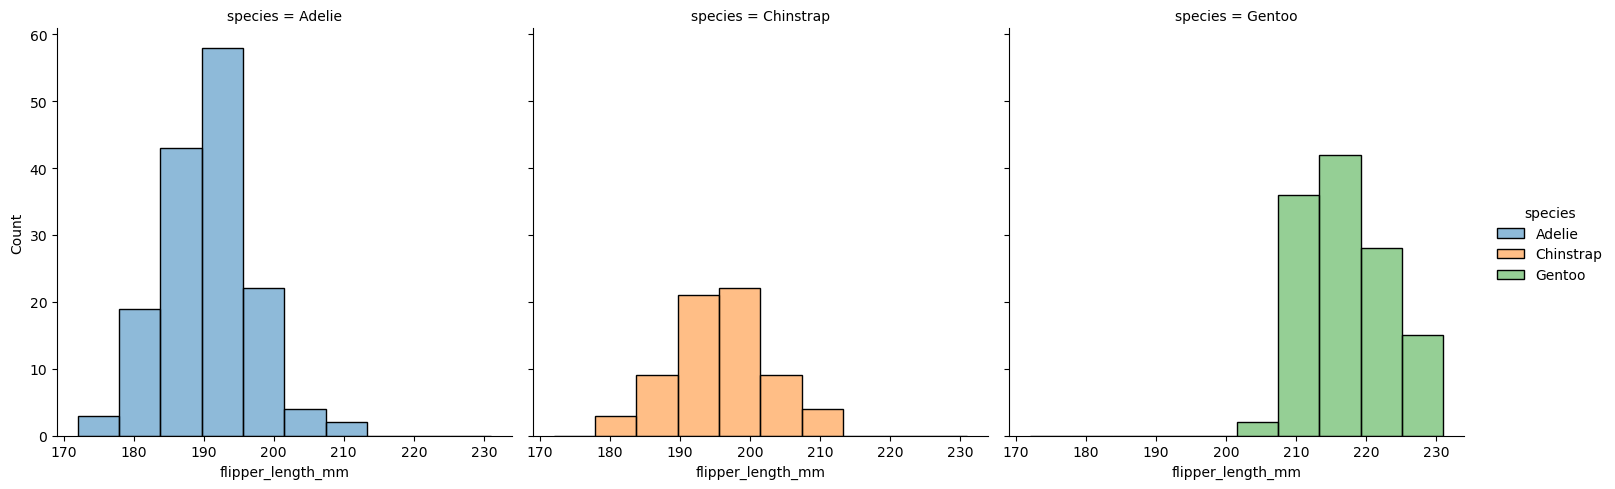

In [6]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

* figure-level functions는 축 수준의(axes-level) counterparts를 감싸고 종류별 키워드 argument(히스토그램의 빈 크기 등)을 기본 함수로 전달한다.
* 이 의미는 figure-level functions는 유연성이 없다는 불리한 면이 있다.
* 특정한 파라미터가 function signature나 docstring에 나타나지 않는다.
* figure-level functions 특징은 찾기 어려울 수 있으며, 특정 목표를 어떻게 달성해야할지 이해하기 위해 문서의 두페이지를 확인해야할 필요가 있다.

## 3. Combining multiple views on the data
* seaborn에서 두가지 중요한 plotting function은 위에서 이야기한 분류에 정확하게 맞지 않는다.
* 'jointplot(), pairplot()은 하나의 그림에서 다양한 측면들을 나타내기 위하여 다른 모듈로부터 다양한 종류의 plots를 이용한다.
* 두 plots는 figure-level 함수이고 다양한 subplots를 그린다.
* 그러나 JointGrid와 PairGrid 각각을 figure를 관리하기 위하여 다른 objects를 사용한다.

* 'jointplot()'은 두 변수의 관계 또는 공통 분포를 표시하기 위하여 각 변수의 univariate 분포를 개별적으로 보여주는 축을 추가한다.

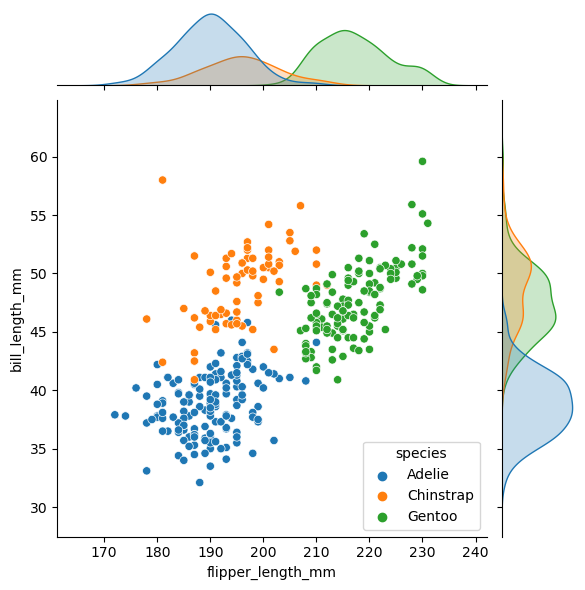

In [3]:
sns.jointplot(data=penguins, x='flipper_length_mm', y = 'bill_length_mm', hue='species')

* pairplot도 비슷하다. joint와 marginal view를 조합한다.
* 그러나 하나의 관계에 집중하기 보다는 변수의 모든 쌍 조합을 동시에 나타낸다.

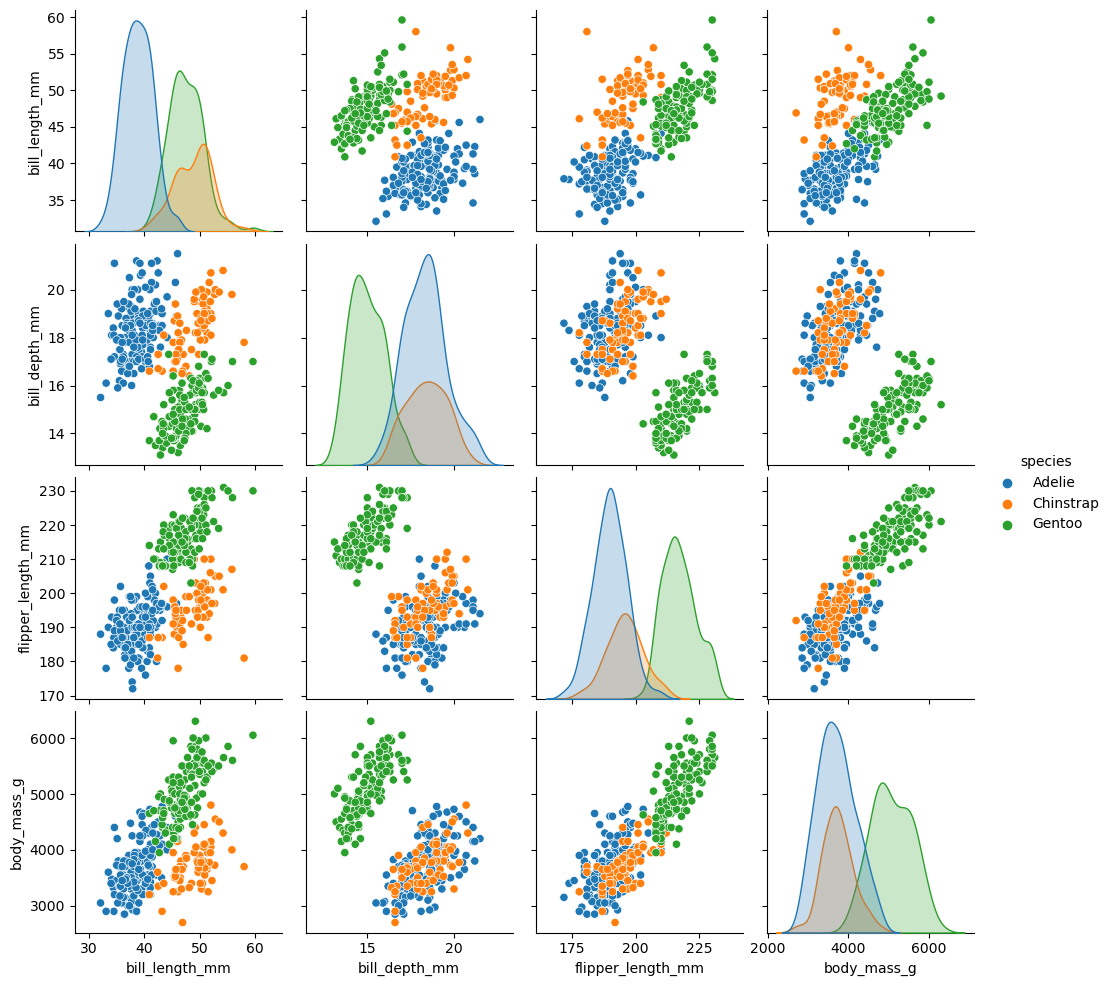

In [4]:
sns.pairplot(data=penguins, hue='species')

* 이 함수들은 이미 공부한 scatterplot()과 kdeplot()axes-level functions에서 사용하는 함수들이다.
* 또한 다른 표현으로 쉽게 바꿀 수 있는 kind parameter를 가지고 있다.

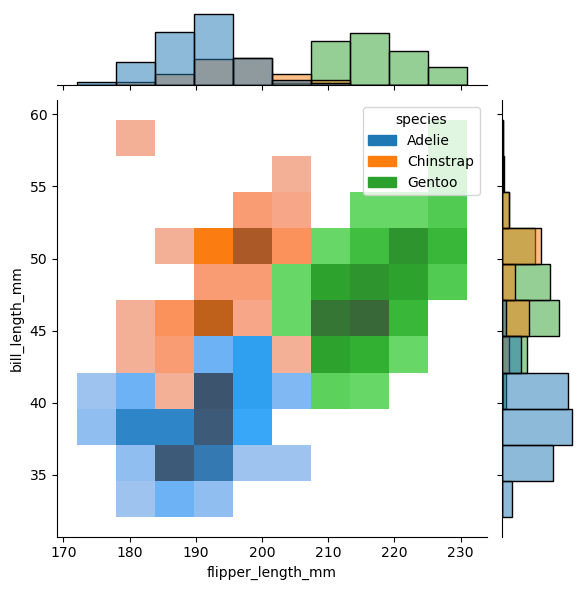

In [5]:
sns.jointplot(data=penguins, x='flipper_length_mm', y= 'bill_length_mm', hue='species', kind='hist')